<a href="https://colab.research.google.com/github/zadevaibhav45/ml-odel/blob/master/RMSE_ex3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
invertebrate_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')

In [8]:
invertebrate_data.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [9]:
invertebrate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [10]:
invertebrate_data.isnull().sum()

SWI            0
SWF            0
temperature    0
size           0
management     0
duration       0
dtype: int64

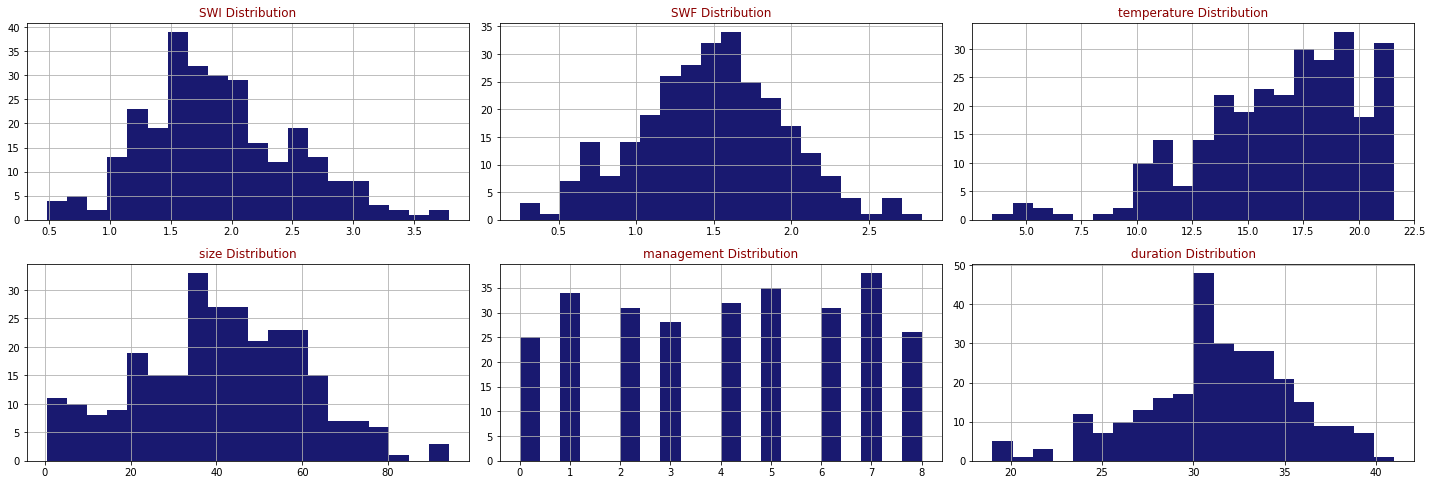

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(invertebrate_data,invertebrate_data.columns,6,3)


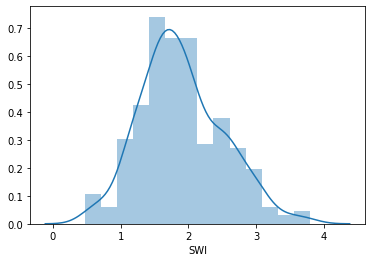

In [15]:
sn.distplot(invertebrate_data['SWI'])

In [16]:
import sklearn
X = invertebrate_data.drop('SWI', axis = 1)
y = invertebrate_data.SWI

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.17198829984450237

In [25]:
rmse = np.sqrt(np.average((y_test - y_pred)**2))

In [26]:
print(rmse)

0.4147147210366451


In [27]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')

In [28]:
test_new.head()

,SWF,temperature,size,management,duration
0,0.86,21.6,21.6,5,32
1,1.30,21.6,23.7,4,35
2,1.79,21.7,32.9,3,39
3,1.92,21.8,47.5,7,34
4,0.90,21.8,42.8,6,35


In [29]:
SWI= lr.predict(test_new)

In [30]:
res = pd.DataFrame(SWI)
res.index = test_new.index
res.columns = ['SWI']
from google.colab import files
res.to_csv('prediction_results_HP.csv')
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>